In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Latar Belakang

Angka Harapan Hidup merupakan suatu index yang menunjukkan rata-rata umur penduduk di suatu negara. Angka harpapan hidup yang tinggi merupakan suatu tanda bahwa negara tersebut berhasil mengingkatkan kesejahteraan dan kesehatan penduduknya. Sehingga, tinggi rendahnya angka harapan hidup ini bisa menjadi sebuah acuan bagi pemerintahan dalam merencanakan program-program untuk masyarakat

# Tujuan EDA
- Menentukan faktor-faktor yang mempengaruhi angka harapan hidup secara global
- Melihat persebaran angka harapan hidup di Indonesia

In [2]:
who = pd.read_csv('WHO.txt')

In [3]:
whoDesc = []

for i in who.columns:
    whoDesc.append([
        i,
        who[i].dtypes,
        who[i].isna().sum(),
        round((who[i].isna().sum()/len(who))*100,2),
        who[i].nunique(),
        who[i].drop_duplicates().sample(2).values
    ])

Deskripsi kolom WHO

In [4]:
pd.DataFrame(whoDesc, columns=[
    "Nama Kolom",
    "Tipe Kolom",
    "Jumlah Null",
    "Presentase Null",
    "Jumlah Data Unik",
    "Contoh Data Unik"
])

,Nama Kolom,Tipe Kolom,Jumlah Null,Presentase Null,Jumlah Data Unik,Contoh Data Unik
0,Country,object,0,0.00,193,"[Nauru, Iraq]"
1,Year,int64,0,0.00,16,"[2013, 2007]"
2,Status,object,0,0.00,2,"[Developing, Developed]"
3,Life expectancy,float64,10,0.34,362,"[67.0, 82.5]"
4,Adult Mortality,float64,10,0.34,425,"[419.0, 97.0]"
5,infant deaths,int64,0,0.00,209,"[49, 29]"
6,Alcohol,float64,194,6.60,1076,"[11.76, 10.74]"
7,percentage expenditure,float64,0,0.00,2328,"[376.4570185, 3979.057728]"
8,Hepatitis B,float64,553,18.82,87,"[69.0, 32.0]"
9,Measles,int64,0,0.00,958,"[471, 203]"


In [5]:
temp = who.drop(who[who.isna().any(axis=1)].index)

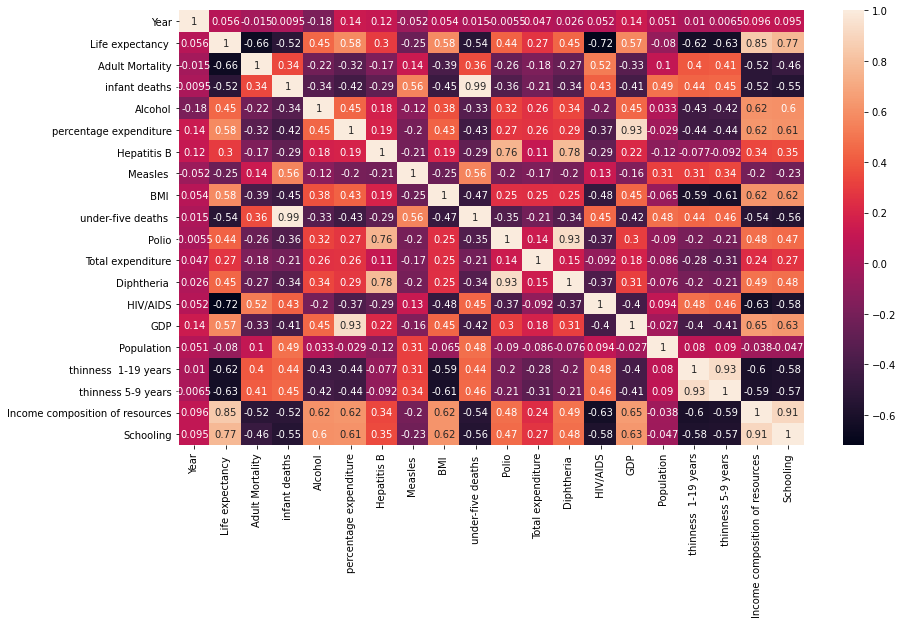

In [6]:
plt.figure(figsize=(14,8))
sns.heatmap(temp.corr("spearman"),annot=True)

kolom berpengaruh = Adult Mortality, HIV/AIDS, income composition of resources dan schooling

karena memiliki korelasi mendekati 1/-1

In [7]:
who.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df = who.loc[:,['Country','Year','Status','Life expectancy ','Adult Mortality',' HIV/AIDS','Income composition of resources','Schooling']]

### Data Cleaning

In [9]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
 HIV/AIDS                            0
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
# Mencari nan dalam kolom target

drop_list = df[df['Life expectancy '].isna()].index

# baris yang memiliki nilai target = NaN, akan di drop

df.drop(drop_list,inplace=True)

In [11]:
missing_icor = df[df['Income composition of resources'].isna()]['Country'].unique()

In [12]:
for i in missing_icor:
    x = df[df.Country == i]
    print(x['Income composition of resources'].mean(),i)

nan Côte d'Ivoire
nan Czechia
nan Democratic People's Republic of Korea
nan Democratic Republic of the Congo
nan Republic of Korea
nan Republic of Moldova
nan Somalia
nan United Kingdom of Great Britain and Northern Ireland
nan United Republic of Tanzania
nan United States of America


10 Negara tersebut tidak memiliki data income composition of resources, sehingga data 10 nagara tersebut akan didrop

In [13]:
drop_list = df[df['Income composition of resources'].isna()].index
df.drop(drop_list,inplace=True)

In [14]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
 HIV/AIDS                          0
Income composition of resources    0
Schooling                          0
dtype: int64

### EDA

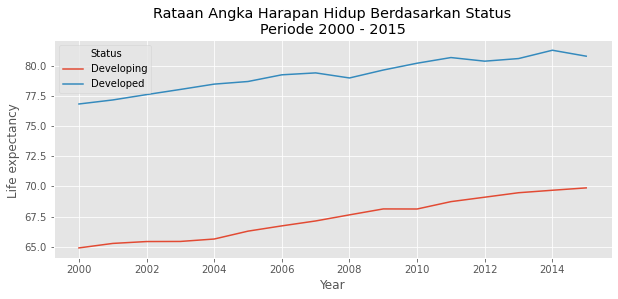

In [15]:
# Melihat grafik angka harapan hidup dari tahun 2000 - 2015 secara global

style.use('ggplot')
plt.figure(figsize=(10,4))
sns.lineplot(x = 'Year', y = 'Life expectancy ', data = df, hue='Status',ci=None)
plt.title('Rataan Angka Harapan Hidup Berdasarkan Status\nPeriode 2000 - 2015')
plt.show()

Jika dilihat pada grafik diatas, angka harapan hidup di negara maju jauh lebih tinggi dibandingkan dengan negara berkembang, dengan selisih 11.9 tahun setiap tahunnya.

Namun baik negara maju dan negara berkembang, memiliki kenaikan pada rata2 angka harapan hidupnya sebesar 4.4 tahun untuk negara maju dan 4.9 tahun untuk negara berkembang jika dilihat dari tahun 2000 sampai 2015

In [16]:
# temp = df.groupby(['Status','Year']).mean()['Life expectancy ']
# temp.loc['Developing'].max() - temp.loc['Developing'].min()

Text(0, 0.5, 'Kematian Umur 15-60 Tahun')

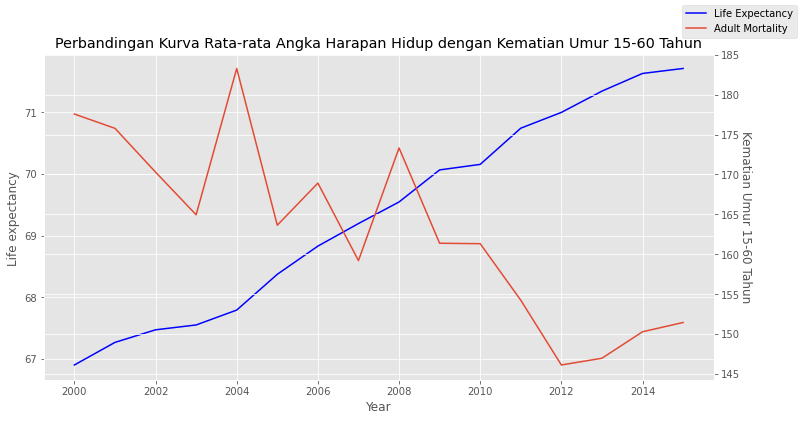

In [27]:
style.use('ggplot')
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="Year", y="Life expectancy ",data=df,color="b",label='Life Expectancy',legend=False,ci=None)
ax2 = ax.twinx()
sns.lineplot(x="Year", y="Adult Mortality", ax=ax2,data =df, label='Adult Mortality',legend=False,ci=None)
plt.title('Perbandingan Kurva Rata-rata Angka Harapan Hidup dengan Kematian Umur 15-60 Tahun')
ax2.figure.legend()
ax2.set_ylabel('Kematian Umur 15-60 Tahun',rotation=270,labelpad=12)

#### Jika dilihat pada grafik diatas, dapat disimpulkan bahwa semakin rendah angka Adult Mortality maka Angka Harapan Hidup kan semakin tinggi

Text(0, 0.5, 'Kematian Akibat HIV/AIDS')

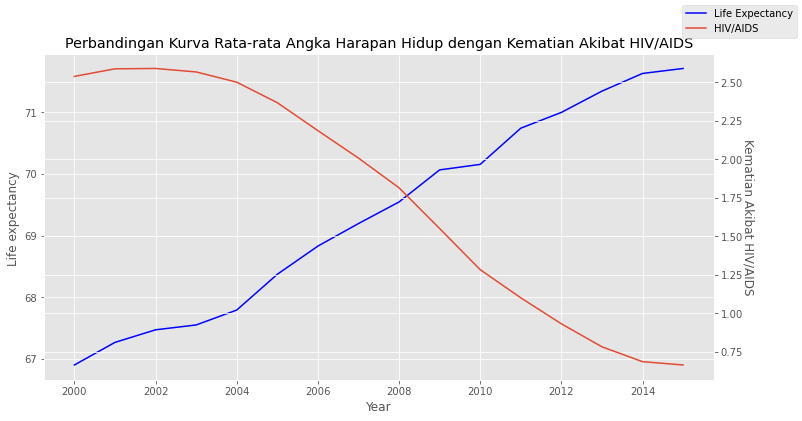

In [28]:
style.use('ggplot')
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="Year", y="Life expectancy ",data=df,color="b",label='Life Expectancy',legend=False,ci=None)
ax2 = ax.twinx()
sns.lineplot(x="Year", y=" HIV/AIDS", ax=ax2,data =df, label='HIV/AIDS',legend=False,ci=None)
plt.title('Perbandingan Kurva Rata-rata Angka Harapan Hidup dengan Kematian Akibat HIV/AIDS')
ax2.figure.legend()
ax2.set_ylabel('Kematian Akibat HIV/AIDS',rotation=270,labelpad=12)

#### Sama seperti grafik Adult Mortality, semakin rendah Angka Kematian akibat HIV/AIDS maka Angka Harapan Hidup akan semakin tinggi

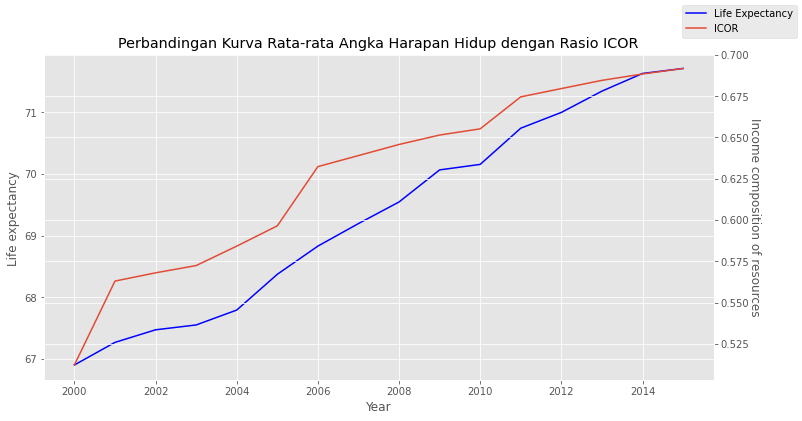

In [30]:
style.use('ggplot')
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="Year", y="Life expectancy ",data=df,color="b",label='Life Expectancy',legend=False,ci=None)
ax2 = ax.twinx()
sns.lineplot(x="Year", y="Income composition of resources", ax=ax2,data =df, label='ICOR',legend=False,ci=None)
plt.title('Perbandingan Kurva Rata-rata Angka Harapan Hidup dengan Rasio ICOR')
ax2.figure.legend()
ax2.set_ylabel('Income composition of resources',rotation=270,labelpad=12)
plt.show()

#### Berdasarkan grafik di atas, dapat disimpulkan bahwa semakin tinggi rasio ICOR maka semakin tinggi pula Angka Harapan Hidupnya

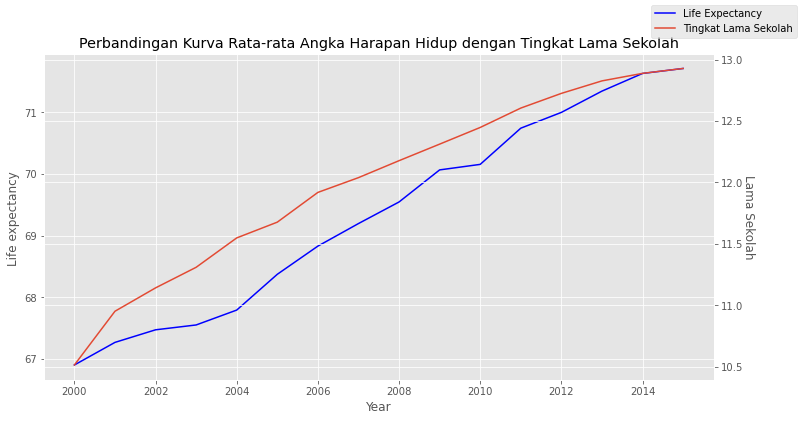

In [31]:
style.use('ggplot')
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="Year", y="Life expectancy ",data=df,color="b",label='Life Expectancy',legend=False,ci=None)
ax2 = ax.twinx()
sns.lineplot(x="Year", y="Schooling", ax=ax2,data =df, label='Tingkat Lama Sekolah',legend=False,ci=None)
plt.title('Perbandingan Kurva Rata-rata Angka Harapan Hidup dengan Tingkat Lama Sekolah')
ax2.figure.legend()
ax2.set_ylabel('Lama Sekolah',rotation=270,labelpad=12)
plt.show()

#### Berdasarkan grafik, semakin lama penduduk mendapatkan pendidikan maka semakin tinggi angka harapan hidupnya

## Korelasi

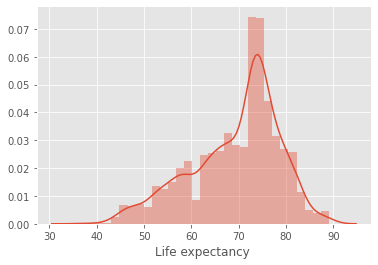

In [32]:
sns.distplot(df['Life expectancy '])

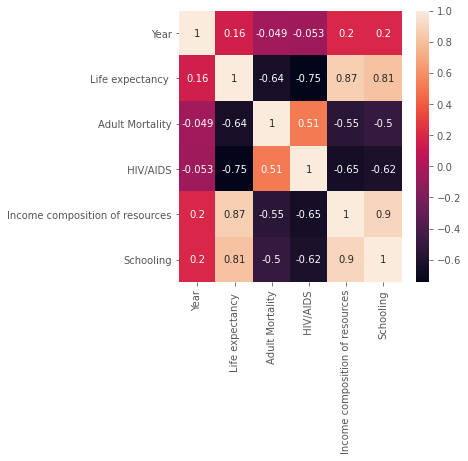

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr('spearman'),annot=True)

#### Berdasarkan data secara global, dapat disimpulkan bahwa Feature Adult Mortality, HIV/AIDS, Income composition of resources dan Schooling memberikan pengaruh yang signifikan terhadap nilai Life Expectancy

### Angka Harapan Hidup di Indonesia

In [34]:
indo = df[df.Country == 'Indonesia']

In [35]:
indo

,Country,Year,Status,Life expectancy,Adult Mortality,HIV/AIDS,Income composition of resources,Schooling
1202,Indonesia,2015,Developing,69.1,176.0,0.3,0.686,12.9
1203,Indonesia,2014,Developing,68.9,179.0,0.3,0.682,12.9
1204,Indonesia,2013,Developing,68.7,181.0,0.3,0.677,12.9
1205,Indonesia,2012,Developing,68.5,183.0,0.3,0.669,12.6
1206,Indonesia,2011,Developing,68.3,185.0,0.3,0.662,12.3
1207,Indonesia,2010,Developing,68.1,187.0,0.3,0.656,12.1
1208,Indonesia,2009,Developing,67.9,189.0,0.3,0.645,11.7
1209,Indonesia,2008,Developing,67.7,189.0,0.2,0.641,11.7
1210,Indonesia,2007,Developing,67.5,19.0,0.2,0.638,11.0
1211,Indonesia,2006,Developing,67.3,191.0,0.1,0.632,10.9


In [36]:
# Terdapat pencilan data Adult Mortality pada tahun 2005 dan 2007 yang kemungkinan besar merupakan error input, data di drop
indo = indo.drop(indo[indo['Adult Mortality'] < 100].index)

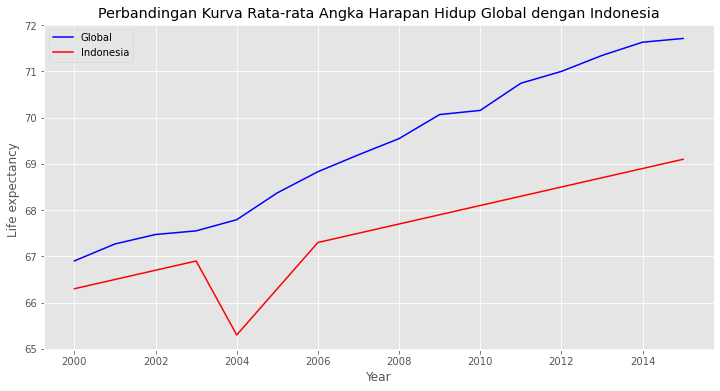

In [37]:
style.use('ggplot')
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Life expectancy ",data=df,color="b",label='Global',legend=False,ci=None)
sns.lineplot(x="Year", y="Life expectancy ",data=indo,color="r",label='Indonesia',legend=False,ci=None)
plt.title('Perbandingan Kurva Rata-rata Angka Harapan Hidup Global dengan Indonesia')
plt.legend()
plt.show()

Angka Harapan Indonesia mengalami kenaikan 2.8 tahun dari 2000 sampai 2015. Namun Angka Harapan Indonesia masih dibawah rata-rata Angka Harapan secara Global

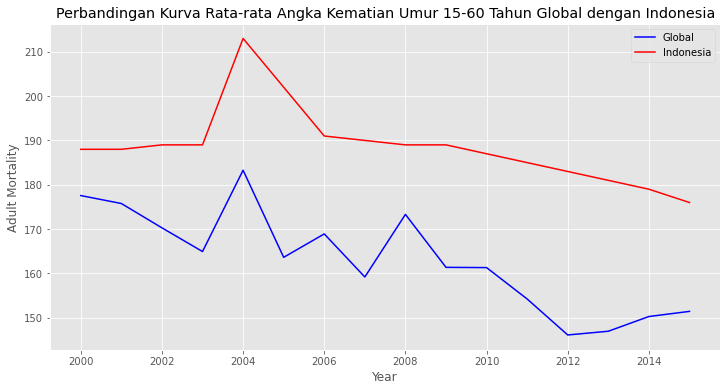

In [38]:
style.use('ggplot')
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Adult Mortality",data=df,color="b",label='Global',legend=False,ci=None)
sns.lineplot(x="Year", y="Adult Mortality",data=indo,color="r",label='Indonesia',legend=False,ci=None)
plt.title('Perbandingan Kurva Rata-rata Angka Kematian Umur 15-60 Tahun Global dengan Indonesia')
plt.legend()
plt.show()

Angka Adult Mortality di Indonesia terlihat lebih tinggi dibandingkan dengan rata-rata Adult Mortality secara global

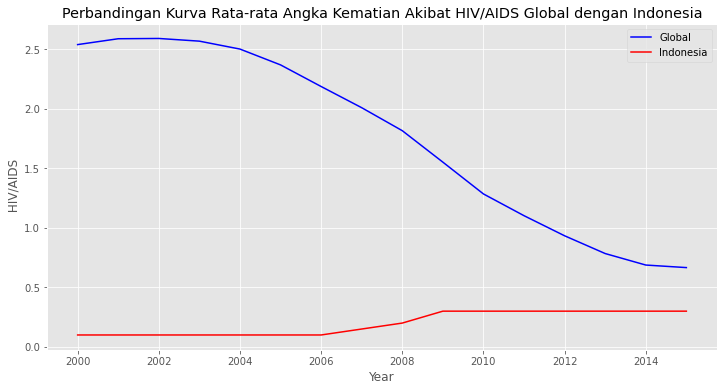

In [41]:
style.use('ggplot')
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y=" HIV/AIDS",data=df,color="b",label='Global',legend=False,ci=None)
sns.lineplot(x="Year", y=" HIV/AIDS",data=indo,color="r",label='Indonesia',legend=False,ci=None)
plt.title('Perbandingan Kurva Rata-rata Angka Kematian Akibat HIV/AIDS Global dengan Indonesia')
plt.legend()
plt.show()

Angka kematian akibat HIV/AIDS di Indonesia terlihat lebih rendah dibandingkan dengan rata-rata kematian akibat HIV/AIDS secara global

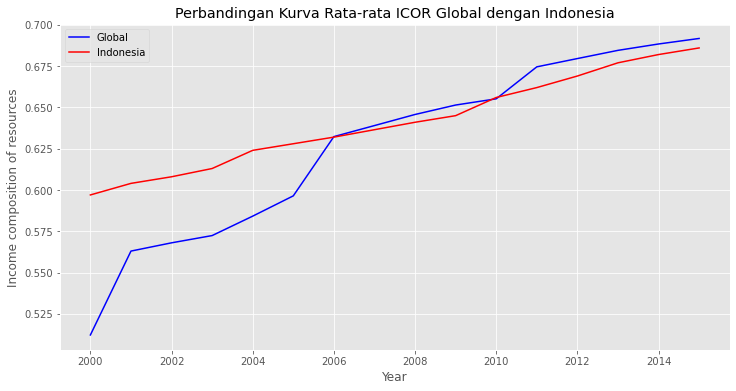

In [43]:
style.use('ggplot')
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Income composition of resources",data=df,color="b",label='Global',legend=False,ci=None)
sns.lineplot(x="Year", y="Income composition of resources",data=indo,color="r",label='Indonesia',legend=False,ci=None)
plt.title('Perbandingan Kurva Rata-rata ICOR Global dengan Indonesia')
plt.legend()
plt.show()

Angka ICOR (income of composition of resources) di Indonesia pada tahun 2000-2005 lebih tinggi dibandingkan dengan rata-rata ICOR secara global pada tahun tersebut. Namun pertambahan angka ICOR di Indonesia tidak terlalu tinggi sehingga pada tahun 2008-2015, ICOR Indonesia berada di bawah rata-rata ICOR global

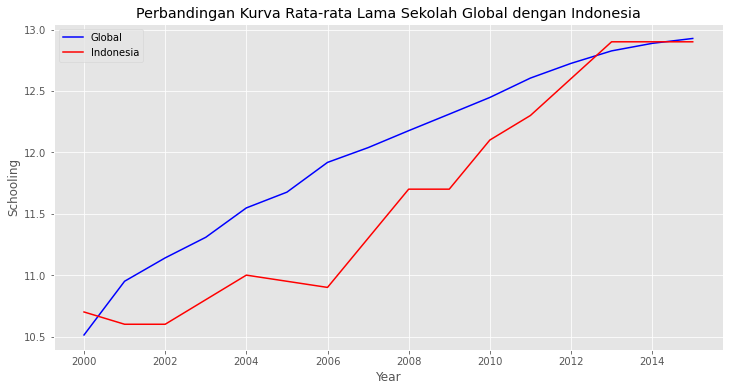

In [44]:
style.use('ggplot')
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Schooling",data=df,color="b",label='Global',legend=False,ci=None)
sns.lineplot(x="Year", y="Schooling",data=indo,color="r",label='Indonesia',legend=False,ci=None)
plt.title('Perbandingan Kurva Rata-rata Lama Sekolah Global dengan Indonesia')
plt.legend()
plt.show()

Angka Lama Sekolah di Indonesia pada tahun 2000-2012 masih berada di bawah angka rata-rata lama sekolah secara global. Namun pada tahun 2013, Indonesia berhasil meningkatkan angka lama sekolah sehingga berada di atas rata-rata angka sekolah secara global.

#### Overview

In [45]:
df['region'] = 'global'
indo['region'] = 'indo'
pd.concat([df,indo]).groupby('region').mean()

,Year,Life expectancy,Adult Mortality,HIV/AIDS,Income composition of resources,Schooling
region,,,,,,
global,2007.500000,69.349566,163.041546,1.760766,0.627419,11.999639
indo,2007.714286,67.585714,187.642857,0.207143,0.642571,11.692857


## Insight

#### Secara umum, Angka Harapan Hidup dipengaruhi oleh beberapa faktor , yaitu:
    1. Adult Morality (Angka Kematian Dewasa)
       Semakin tinggi angka Adult Mortality maka Angka Harapan Hidup akan semakin rendah (korelasi negatif)
    2. HIV/AIDS (Kematian karena HIV/AIDS)
       Semakin tinggi angka HIV/AIDS maka Angka Harapan Hidup akan semakin rendah (korelasi negatif)
    3. Income composition of resources
       Semakin tinggi angka Income compositon of resources maka Angka Harapan Hidup akan semakin tinggi (korelasi positif)
    4. Schooling (Lama Sekolah)
       Semakin tinggi angka Schooling maka Angka Harapan Hidup akan semakin tinggi (korelasi positif)
    
Indonesia memiliki Angka Harapan Hidup yang terbilang rendah, karena masih berada di bawah rata-rata Angka Harapan Hidup secara global. Hal ini disebabkan oleh angka Adult Mortality yang berada di atas rata-rata dan Lama Sekolah yang masih berada di bawah rata-rata

### Kesimpulan

- Angka Harapan Hidup yang tinggi merupakan suatu index bahwa negara berhasil meningkatkan kesejahteraan penduduknya. Angka Harapan Hidup di Indonesia masih dibawah rata-rata Angka Harapan Hidup secara global. Penyebabnya adalah angka Kematian Orang Dewasa yang masih di atas rata-rata dan Lama Sekolah yang masih berada di bawah rata-rata. 

- Kematian orang dewasa di Indonesia secara umum disebabkan oleh penyakit yang diderita

- Semakin lama seseorang mendapatkan pendidikan sekolah maka semakin besar kesempatan orang tersebut untuk meningkatkan kesejahteraan hidupnya dibandingkan dengan orang yang lebih sedikit mendapatkan pendidikan

### Saran

Perlunya peningkatan sektor kesehatan dan pendidikan di Indonesia untuk meningkatkan Angka Harapan Hidup